**NLP: Twitter Sentiment Analysis**

*   Import libraries and datasets
*   Perform Exploratory Data Analysis
*   Plot the word cloud
*   Perform data cleaning - removing punctuation
*   Perform data cleaning - remove stop words
*   Perform Count Vectorization (Tokenization)
*   Create a pipeline to remove stop-words, punctuation, and perform tokenization
*   Understand the theory and intuition behind Naive Bayes classifiers
*   Train a Naive Bayes Classifier
*   Assess trained model performance

In [42]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

In [15]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/alexandra/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [43]:
# Load dataset
df = pd.read_csv("Downloads/twitter_training.csv", header=None)
df.columns = ['ID', 'Game', 'Sentiment', 'Text']

In [44]:
# Perform Exploratory Data Analysis
df.head()

ID         Game Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

In [45]:
print(df.info())
print(df.describe())
print(df['Sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Game       74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None
                 ID
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000
Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [46]:
# Plot the word cloud
def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=set(stopwords.words('english')),
                          min_font_size=10).generate(text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

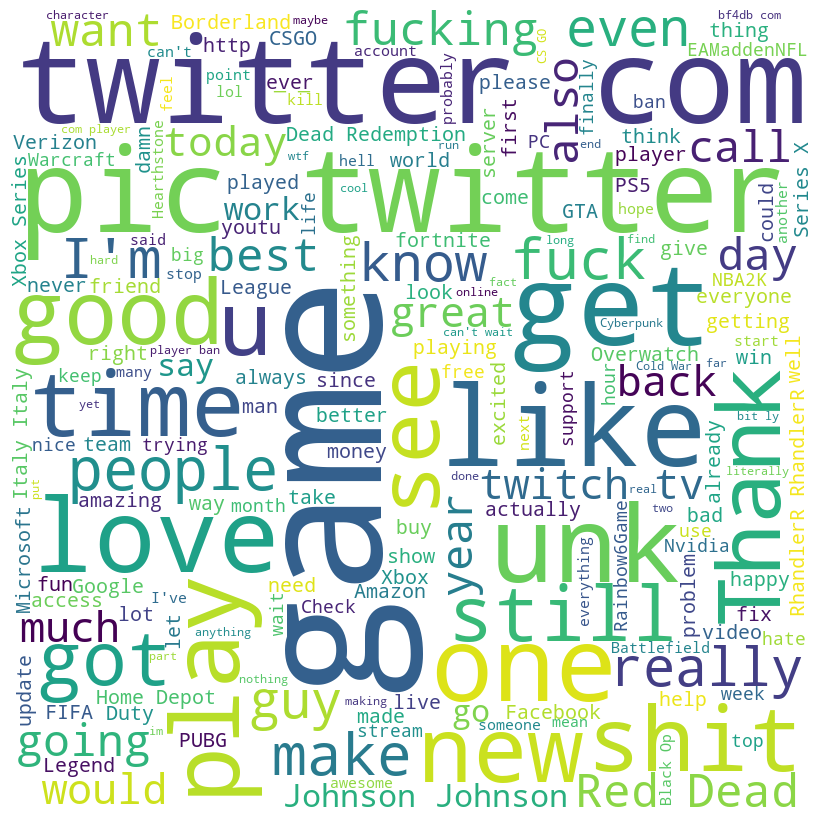

In [47]:
all_text = ' '.join(df['Text'].astype(str))
plot_wordcloud(all_text)

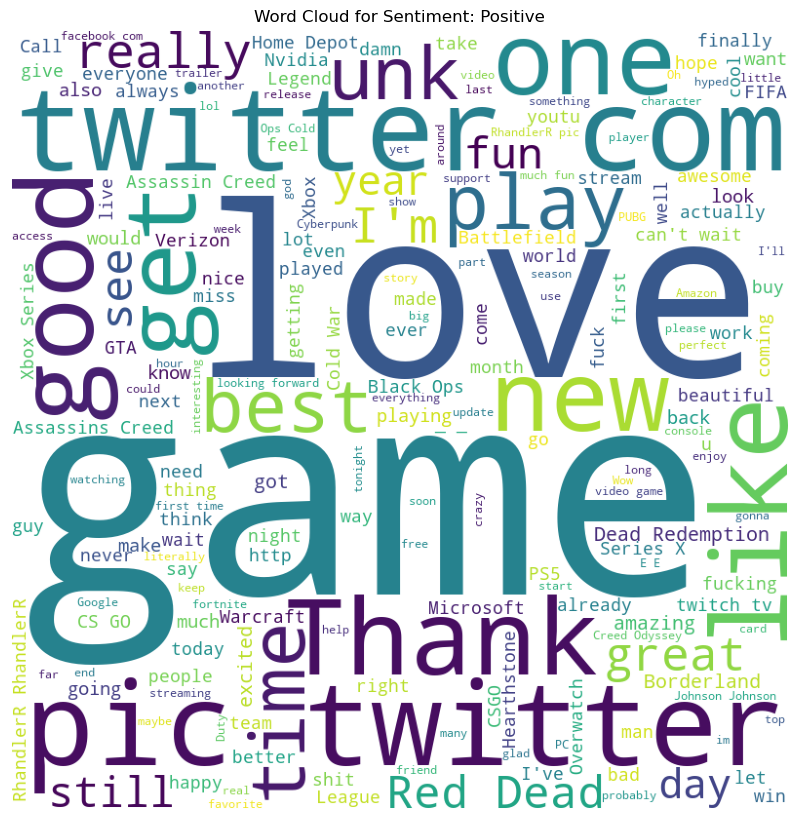

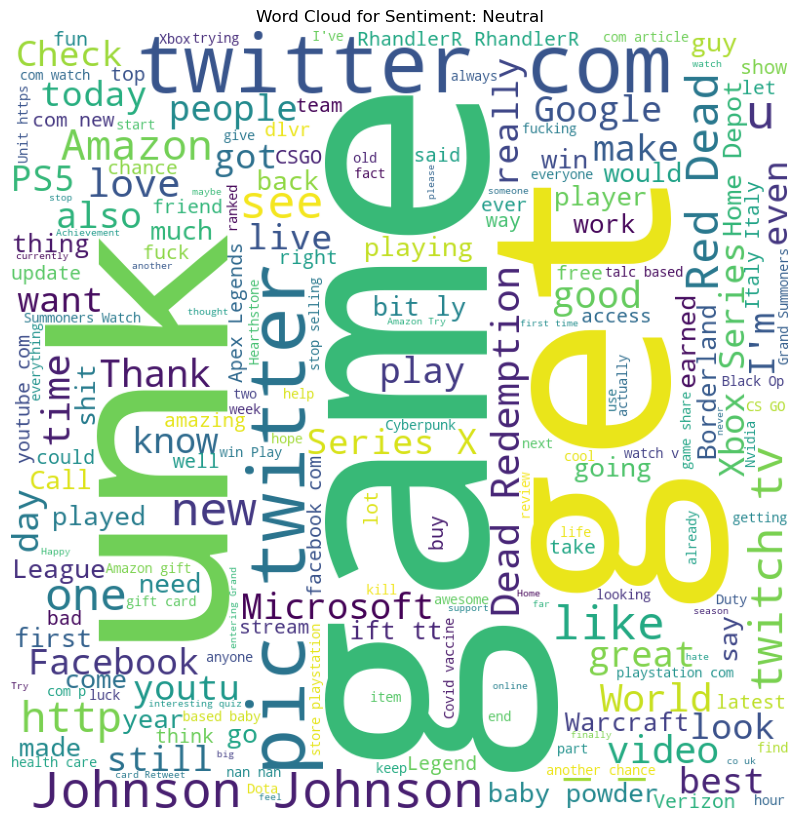

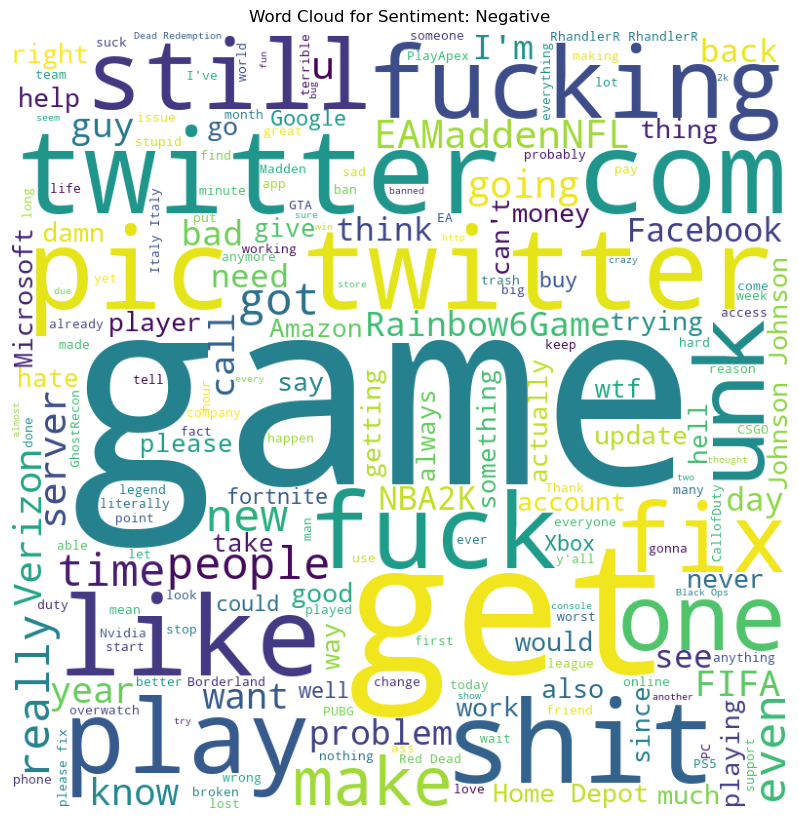

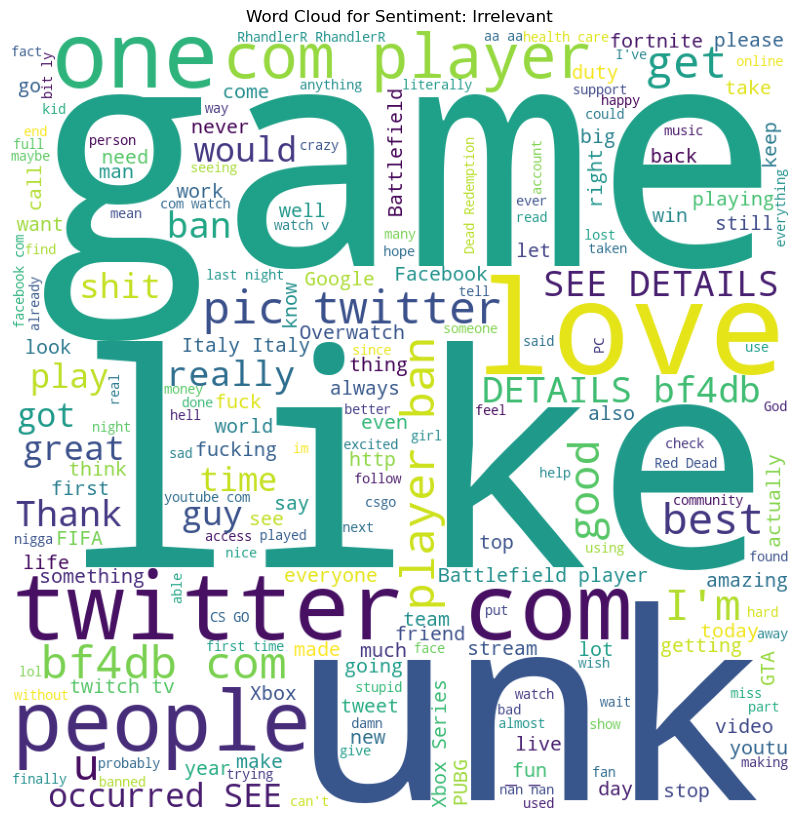

In [48]:
def plot_wordcloud_by_sentiment(df):
    sentiment_types = df['Sentiment'].unique()

    for sentiment in sentiment_types:
        text = ' '.join(df[df['Sentiment'] == sentiment]['Text'].astype(str))

        wordcloud = WordCloud(width=800, height=800, background_color='white',
                              stopwords=set(stopwords.words('english')), min_font_size=10).generate(text)

        plt.figure(figsize=(8, 8), facecolor=None)
        plt.imshow(wordcloud)
        plt.title(f'Word Cloud for Sentiment: {sentiment}')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()

# Example usage:
plot_wordcloud_by_sentiment(df)

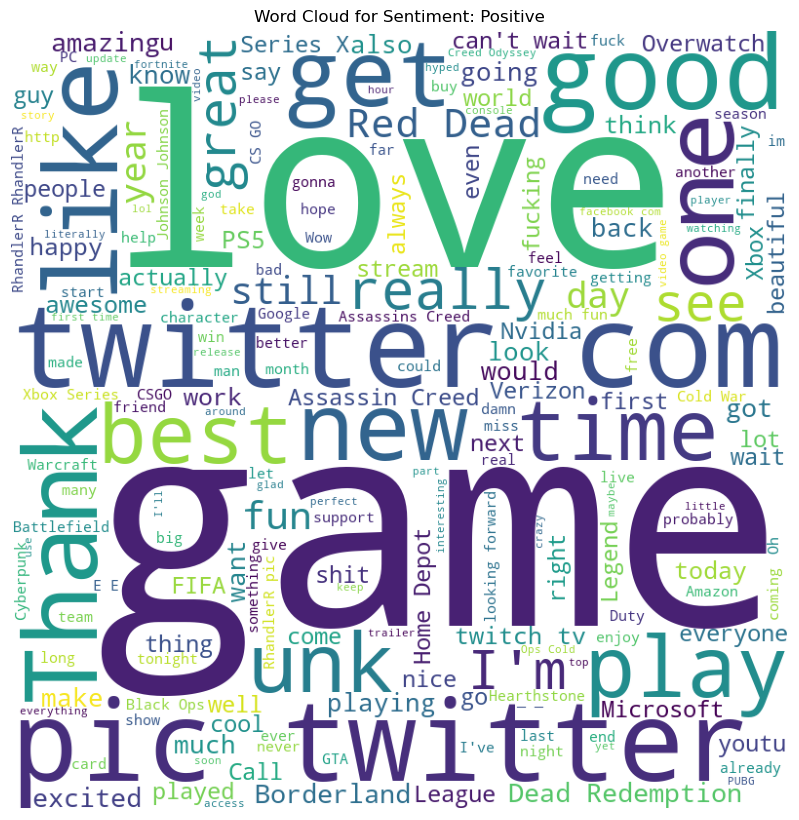

In [52]:
def plot_wordcloud_positive(df, sentiment):
    positive_text = ' '.join(df[df['Sentiment'] == sentiment]['Text'].astype(str))

    wordcloud = WordCloud(width=800, height=800, background_color='white',
                          stopwords=set(stopwords.words('english')), min_font_size=10).generate(positive_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud for Sentiment: {sentiment}')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

# Example usage:
plot_wordcloud_positive(df, sentiment="Positive")

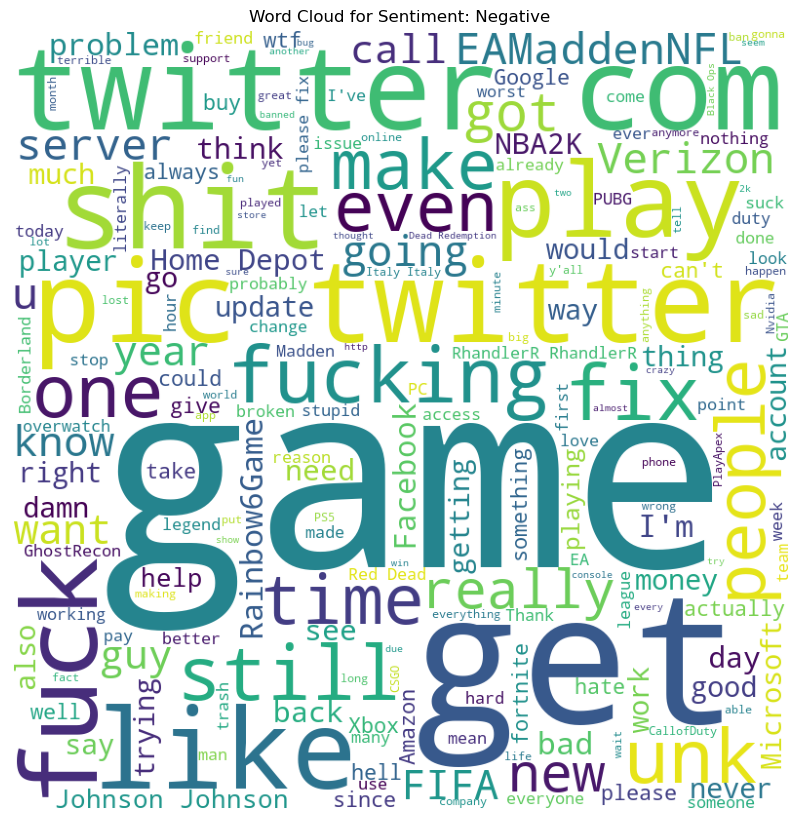

In [53]:
# Example usage:
plot_wordcloud_positive(df, sentiment="Negative")

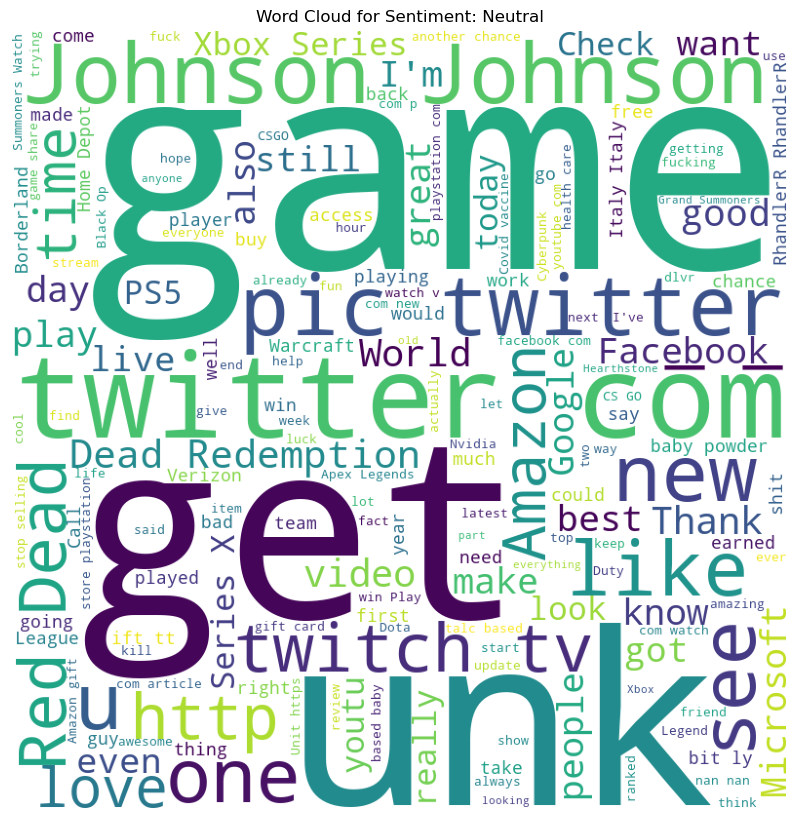

In [54]:
# Example usage:
plot_wordcloud_positive(df, sentiment="Neutral")

In [23]:
# Data cleaning - removing punctuation
def remove_punctuation(text):
    if pd.isnull(text):
        return ""
    return str(text).translate(str.maketrans('', '', string.punctuation))

In [24]:
df['Text'] = df['Text'].apply(remove_punctuation)

# Data cleaning - remove stop words
stop_words = set(stopwords.words('english'))

In [25]:
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [26]:
df['Text'] = df['Text'].apply(remove_stop_words)

In [27]:
# Perform Count Vectorization (Tokenization)
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Sentiment'], test_size=0.2, random_state=42)

In [28]:
# Create a pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Train a Naive Bayes Classifier
text_clf.fit(X_train, y_train)

# Assess trained model performance
y_pred = text_clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7229698065207204

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.96      0.42      0.58      2592
    Negative       0.64      0.91      0.75      4519
     Neutral       0.84      0.59      0.69      3596
    Positive       0.71      0.82      0.76      4230

    accuracy                           0.72     14937
   macro avg       0.79      0.69      0.70     14937
weighted avg       0.76      0.72      0.71     14937


Confusion Matrix:
 [[1086  785  141  580]
 [   8 4115  124  272]
 [  19  901 2129  547]
 [  17  595  149 3469]]
